
انواع روش های نایو بیز را نام برده و فرمول اصلی ریاضیاتی نایو بیز را بنویسید

Gaussian Naive Bayes
Multinomial Naive Bayes
Bernoulli Naive Bayes

را توضیح دهید svm naivebase knn  اساس کار و روش انجام مدل های

naivebase:    جز الگوریتم های کلاسیفیکیشن است براساس قضیه بیز است و با این فرض که پیش بینی کننده ها مستقل هستند 
knn:  بدون پارامتر است درباره داده اصلی هیچ فرضی در نظر نمی گیرد از تمام داده برای یادگیری استفاده میکند با یکی از متدهای اقلیدسی یا منهتن یا همینگ فاصله بین داده را با هر سطر مجموعه ترین حساب میکند و به تعداد کا که میتواند هر عدد صحیحی باشد تعداد فاصله های نزدیک را انتخاب میکند از بین آنها بیشترین لیبل مربوط را انتخاب میکند
svm:  به دنبال ابر صفحه ای هستیم  که مارجین یا حاشیه اطمینان بیشتری داشته باشد در حالت ساده یک خط و در نزديکترين داده هاي آموزشي به ابر صفحه هاي جدا کننده بردار پشتيبان ناميده مي شوند حالت پیچیده یک ابر صفحه است 

در مدل ها چه راهکاری را پیشنهاد میدهید TP TN FP FNبرای پیدا کردن     

Accuracy = (TP+TN) / (TP+FN+FP+TN)
Sensitivity (TPR) =TP / (TP+FN)
Specificity (TNR) = TN / (TN+FP)
Precision = TP / (TP + FP)
Recall = TP / (TP+FN)
F-measure= 2 * (Recall * Precision) / (Recall + Precision)

روی داده های گل زنبق تمام روش هایی را که اموخته اید امتحان کنید

In [171]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import SGDClassifier,Perceptron,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [200]:
df= pd.read_csv('iris.csv')
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [201]:
df=df.drop(columns=['Id'])

In [63]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [202]:
df['Species'].replace("Iris-setosa",0,inplace= True)
df['Species'].replace("Iris-virginica",1,inplace = True)
df['Species'].replace("Iris-versicolor",2,inplace=True)

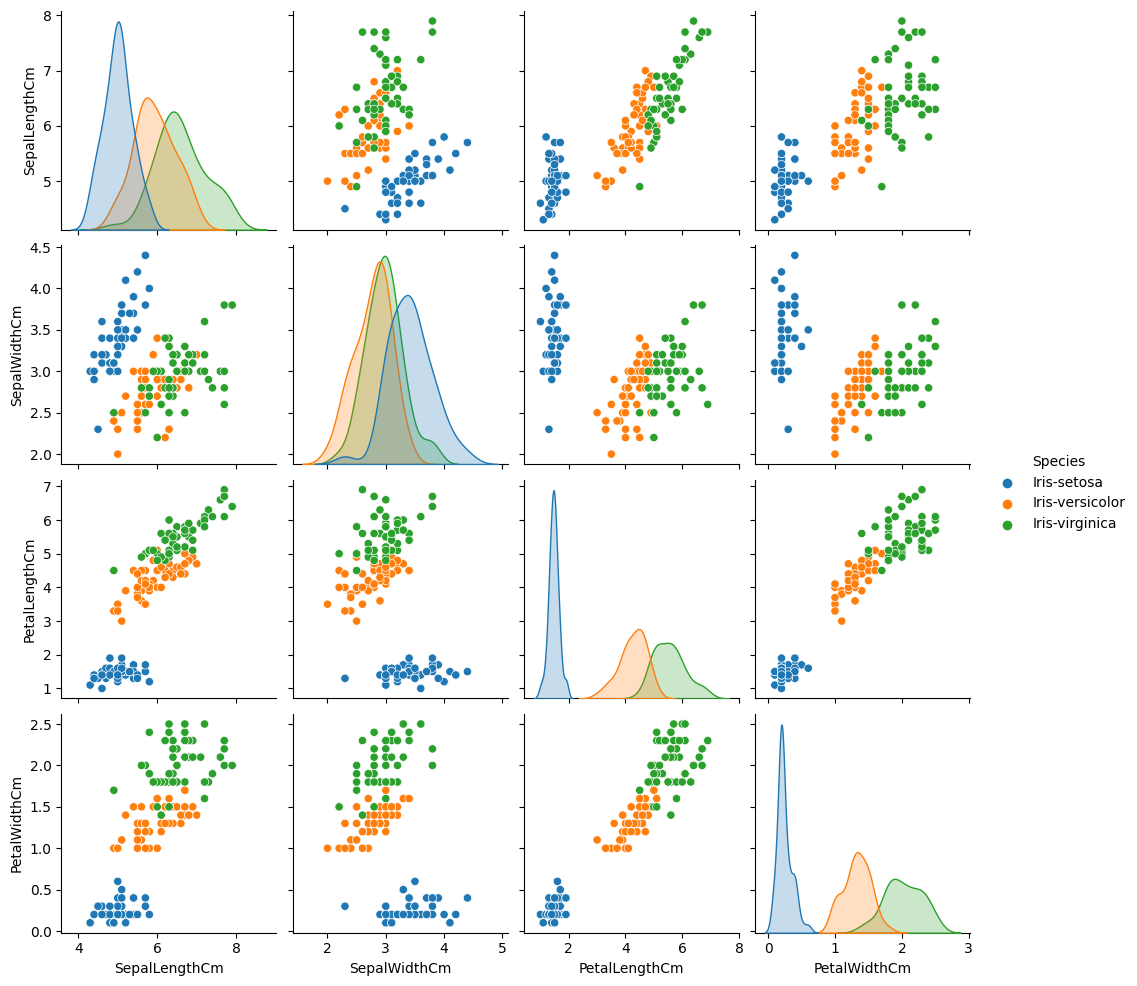

In [14]:
sns.pairplot(df, hue ="Species")

In [144]:
X = df.drop('Species',axis=1)
Y = df['Species']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.2, random_state=0)

In [172]:
nb_model = GaussianNB()  
nb_model.fit(X_train,y_train )

GaussianNB()

In [175]:
y_predic = nb_model.predict(X_test)
y_predic

array([1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 2, 2, 0], dtype=int64)

			GaussianNB:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30
 

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


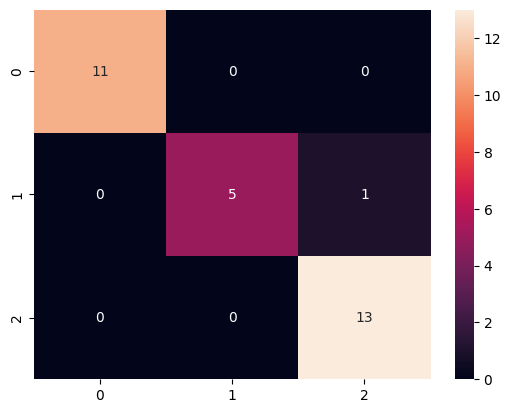

In [174]:
class_rep_NB = classification_report(y_test, y_predic)
cf_matrix = confusion_matrix(y_test, y_predic)
print('\t\t\tGaussianNB:\n\n', class_rep_NB, '\n')
sns.heatmap(cf_matrix, annot=True)
print(metrics.confusion_matrix(y_test, y_predic))

In [139]:
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(loss="hinge",penalty="l2",alpha= 0.0001,
                                max_iter=1000, tol=1e-3,  random_state= 3))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=3))])

In [140]:
y_sgd= clf.predict(X_test)

SGD Classifier_SVM:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 

[[11  0  0]
 [ 0  6  0]
 [ 0  0 13]]


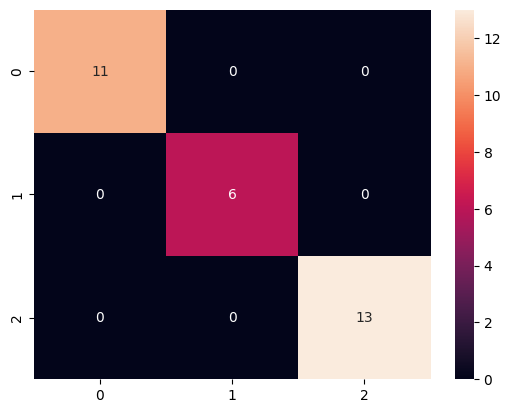

In [141]:
target_names = ['setosa', 'versicolor', 'virginica']
class_sgd = classification_report(y_test, y_sgd,target_names = target_names)
cf_matrix = confusion_matrix(y_test, y_sgd)
print('SGD Classifier_SVM:\n\n', class_sgd, '\n')
sns.heatmap(cf_matrix, annot=True)
print(metrics.confusion_matrix(y_test, y_sgd))

In [147]:
clfp = Perceptron(max_iter=100, tol=1e-4, eta0=0.1, n_jobs=-1,
                  random_state=8, penalty='l2')
clfp.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100, n_jobs=-1, penalty='l2', random_state=8,
           tol=0.0001)

In [148]:
ypred = clfp.predict(X_test)

Perceptron:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
 

[[11  0  0]
 [ 0  6  0]
 [ 0  1 12]]


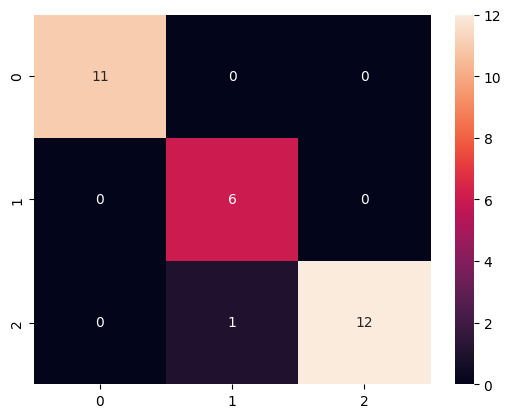

In [149]:
target_names = ['setosa', 'versicolor', 'virginica']
class_perc = classification_report(y_test, ypred,target_names = target_names)
cf_matrix = confusion_matrix(y_test, ypred)
print('Perceptron:\n\n', class_perc, '\n')
sns.heatmap(cf_matrix, annot=True)
print(metrics.confusion_matrix(y_test, ypred))

In [163]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', 
                                multi_class='auto')
classifier.fit(X_train, y_train)

C:\Users\aghebati.pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [164]:
y_predict = classifier.predict(X_test)

Logistic Regression:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 

[[11  0  0]
 [ 0  6  0]
 [ 0  0 13]]


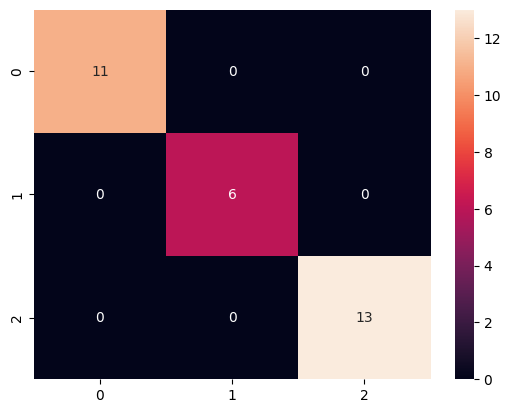

In [165]:
target_names = ['setosa', 'versicolor', 'virginica']
class_perc = classification_report(y_test, y_predict,target_names = target_names)
cf_matrix = confusion_matrix(y_test, y_predict)
print('Logistic Regression:\n\n', class_perc, '\n')
sns.heatmap(cf_matrix, annot=True)
print(metrics.confusion_matrix(y_test, y_predict))

Logistic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<AxesSubplot: >

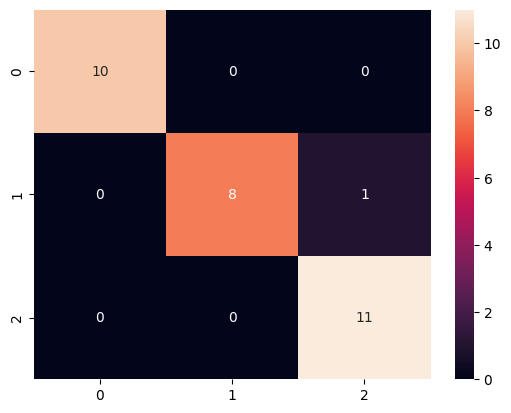

In [152]:
classk = KNeighborsClassifier(n_neighbors=3)
classk.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [153]:
y_pred = classk.predict(X_test)

knn:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
 

[[11  0  0]
 [ 0  6  0]
 [ 0  1 12]]


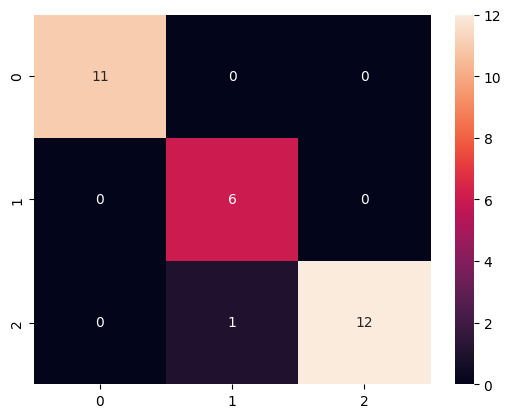

In [154]:
target_names = ['setosa', 'versicolor', 'virginica']
class_k = classification_report(y_test, y_pred,target_names = target_names)
cf_matrix = confusion_matrix(y_test, y_pred)
print('knn:\n\n', class_k, '\n')
sns.heatmap(cf_matrix, annot=True)
print(metrics.confusion_matrix(y_test, y_pred))

In [167]:
acc1 = accuracy_score(y_test, y_predic)
print("accuracy :",acc1  )
acc2 = accuracy_score(y_test, y_sgd)
print("accuracy :",acc2)
acc3 = accuracy_score(y_test, ypred)
print("accuracy :",acc3)
acc4  = accuracy_score(y_test, y_pred) 
print("accuracy :",acc4)
acc5 = accuracy_score(y_test, y_predict)
print("accuracy :",acc5)

accuracy : 1.0
accuracy : 1.0
accuracy : 0.9666666666666667
accuracy : 0.9666666666666667
accuracy : 1.0


accuracy : 0.9416666666666668
accuracy : 0.7833333333333333
accuracy : 0.9583333333333334
accuracy : 0.6083333333333333
accuracy : 0.9500000000000001


[[40  0  0]
 [ 0 37  4]
 [ 0  3 36]]
[[40  0  0]
 [21 16  4]
 [ 0  1 38]]
[[40  0  0]
 [ 0 38  3]
 [ 0  2 37]]
[[39  1  0]
 [ 1 37  3]
 [ 0  5 34]]
[[40  0  0]
 [ 0 38  3]
 [ 0  3 36]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.90      0.91        41
   virginica       0.90      0.92      0.91        39

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

              precision    recall  f1-score   support

      setosa       0.66      1.00      0.79        40
  versicolor       0.94      0.39      0.55        41
   virginica       0.90      0.97      0.94        39

    accuracy                           0.78       120
   macro avg       0.83      0.79      0.76       120
weighted avg       0.83      0.78      0.76       120

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.93      0.94        41
   virginica       0.93      0.95      0.94        39

    accuracy        

بالایی دارند را پاک کرده و دوباره مدلی که این کار روی آن تاثیر گذار است را امتحان کنید corrolationحال ستونی که 

بر روی مدل های خطی مانند Logistic Regression وlinear regression تاثیر دارد

<AxesSubplot: >

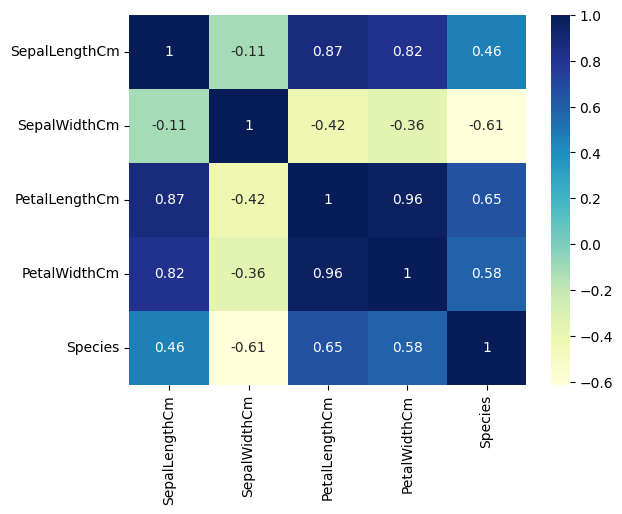

In [197]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In [184]:
df.corr()

C:\Users\aghebati.pc\AppData\Local\Temp\ipykernel_8100\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [203]:
df=df.drop(['PetalWidthCm'],axis=1)


In [204]:
X = df.drop('Species',axis=1)
Y = df['Species']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.2, random_state=0)

In [206]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', 
                                multi_class='auto')
classifier.fit(X_train, y_train)

C:\Users\aghebati.pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [208]:
y_predict = classifier.predict(X_test)
acc = accuracy_score(y_test, y_predict)
print("accuracy :",acc)

accuracy : 0.9666666666666667


دقت مدل کاهش یافت

### try svm on below dataset and get accuracy more than 95 

In [181]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [28]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [182]:
dfwine = pd.DataFrame(wine.data, columns=wine.feature_names)
dfwine['label'] = wine.target
dfwine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [212]:
from sklearn.svm import SVC

In [209]:
X=dfwine.iloc[: , 1:14].values
y=dfwine.iloc[: ,-1].values

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, 
                                                 random_state=0)

In [211]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [213]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [214]:
y_pred=classifier.predict(X_test)

In [216]:
SF = accuracy_score(y_test, y_pred)
SF

1.0

In [217]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
